In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


In [2]:
# read in training data
train_data = pd.read_csv('/Users/laurenflemmer/Desktop/poker_proj/data/poker-hand-training-transformed.csv')
train_data.head(10)

Y = train_data['hand']
X = train_data.drop('hand', axis=1)

### Oversample minority classes using SMOTE

0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
8        5
9        4
Name: hand, dtype: int64


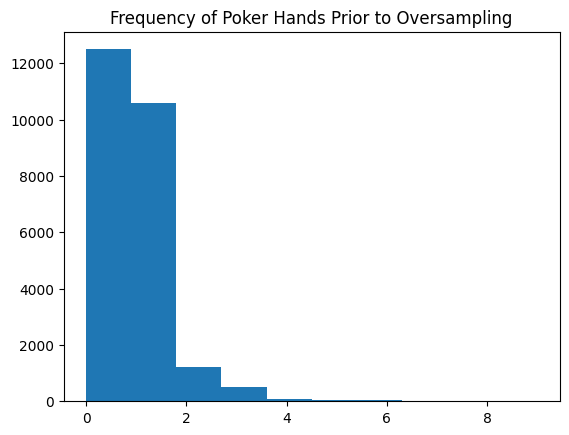

In [3]:
plt.hist(Y)
plt.title("Frequency of Poker Hands Prior to Oversampling")
plt.show

print(Y.value_counts())

In [4]:
# smote: oversample classes 2-9
strategy = {0:12493, 1:10599, 2:1206, 3:3000, 4:513, 5:200, 6:200, 7:100, 8:100, 9:100}

oversample = SMOTE(sampling_strategy=strategy, random_state=254, k_neighbors=3)
X_smote, Y_smote = oversample.fit_resample(X, Y)

0    12493
1    10599
3     3000
2     1206
4      513
5      200
6      200
9      100
8      100
7      100
Name: hand, dtype: int64


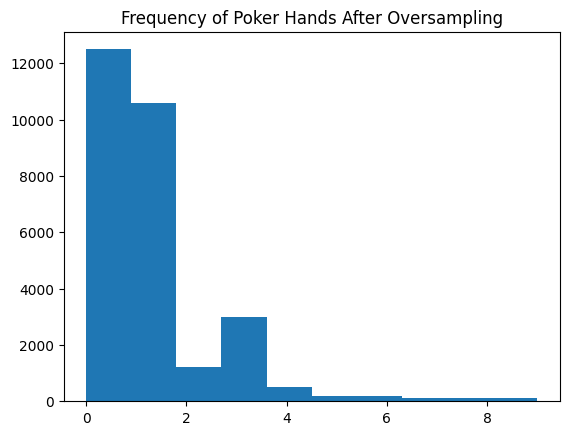

In [5]:
plt.hist(Y_smote)
plt.title("Frequency of Poker Hands After Oversampling")
plt.show

print(Y_smote.value_counts())

In [6]:
# export oversampled data to csv
Y_smote = Y_smote.astype(object)
print(Y_smote)

oversampled = pd.concat([X_smote, Y_smote], axis=1)
oversampled.to_csv('/Users/laurenflemmer/Desktop/poker_proj/data/oversampled_train.csv')

0        9
1        9
2        9
3        9
4        8
        ..
28506    9
28507    9
28508    9
28509    9
28510    9
Name: hand, Length: 28511, dtype: object
